## Load DataFrames

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import All the packages we need

In [3]:
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from gensim.models import Word2Vec
    import warnings 
    warnings.filterwarnings(action = 'ignore') 

## Importing Dataset

In [158]:
data_frame = pd.read_csv("names_data.csv",encoding= 'unicode_escape')
data_frame.head()


,names,nationality
0,Gershon,yiddish
1,Lantz,yiddish
2,Zaide,yiddish
3,Zalman,yiddish
4,Zindel,yiddish


In [5]:
data_frame

,names,nationality
0,Gershon,yiddish
1,Lantz,yiddish
2,Zaide,yiddish
3,Zalman,yiddish
4,Zindel,yiddish
...,...,...
3882,Vidura,Thai
3883,Waan,Thai
3884,Waen,Thai
3885,Yod Rak,Thai


In [6]:
pip install frac


Note: you may need to restart the kernel to use updated packages.


## SHuffle the dataset

In [7]:
data_frame=data_frame.sample(frac=1).reset_index(drop=True)
data_frame

,names,nationality
0,Archimedes,greek
1,Haidar,Indonesian
2,Egor,russian
3,Calvin,latin
4,Valborg,swedish
...,...,...
3882,Kane,Filipino
3883,Buppha,Thai
3884,Remedy,Filipino
3885,Banagher,irish


## Check how much columns we have

In [8]:
data_frame.columns

Index(['names', 'nationality'], dtype='object')

## Lets see our Nationality typs

In [9]:
data_frame['nationality'].unique()

array(['greek', 'Indonesian', 'russian', 'latin', 'swedish',
       'native-american', 'german', 'yiddish', 'japanese',
       'african-american', 'Thai', 'Mongolian', 'celtic', 'hebrew',
       'Pakistani', 'welsh', 'arabic', 'irish', 'hindi', 'italian',
       'vietnamese', 'Cambodian', 'polish', 'hungarian', 'african',
       'scandinavian', 'american', 'teutonic', 'armenian', 'old-english',
       'hawaiian', 'gaelic', 'chinese', 'slavic', 'norse', 'Filipino',
       'turkish', 'indian', 'middle-english', 'old-french', 'old-german',
       'Nepal', 'scottish', 'spanish', 'sanskrit', 'french', 'swahili',
       'english', 'egyptian', 'Bhutan', 'Myanmar', 'polynesian', 'dutch',
       'Bangladeshi', 'persian', 'czechoslovakian', 'korean',
       'Cambodian ', 'old-norse', 'finnish', 'danish', 'Filipino '],
      dtype=object)

## Counting How many Nationality_type We have

In [10]:
Nationality_type=['old-german', 'native-american', 'scottish', 'persian',
       'Indonesian', 'egyptian', 'old-french', 'french', 'irish',
       'american', 'chinese', 'swedish', 'old-english', 'japanese',
       'english', 'Pakistani', 'german', 'turkish', 'Mongolian', 'Thai',
       'celtic', 'arabic', 'Cambodian', 'gaelic', 'vietnamese', 'spanish',
       'Filipino', 'hawaiian', 'Nepal', 'african-american',
       'scandinavian', 'latin', 'slavic', 'polish', 'Bhutan', 'welsh',
       'sanskrit', 'indian', 'hungarian', 'hindi', 'russian', 'african',
       'Bangladeshi', 'italian', 'hebrew', 'middle-english', 'danish',
       'polynesian', 'dutch', 'norse', 'teutonic', 'korean', 'greek',
       'finnish', 'czechoslovakian', 'old-norse', 'swahili', 'yiddish',
       'Myanmar', 'armenian', 'Cambodian ', 'Filipino ']

In [11]:
len(Nationality_type)

62

## lets see the number of names we have in every nationality type

In [12]:
data_frame.groupby('nationality')['names'].count()


nationality
Bangladeshi     30
Bhutan          13
Cambodian       97
Cambodian        5
Filipino       166
              ... 
teutonic        32
turkish         52
vietnamese      52
welsh           91
yiddish         11
Name: names, Length: 62, dtype: int64

## Showing them graphically

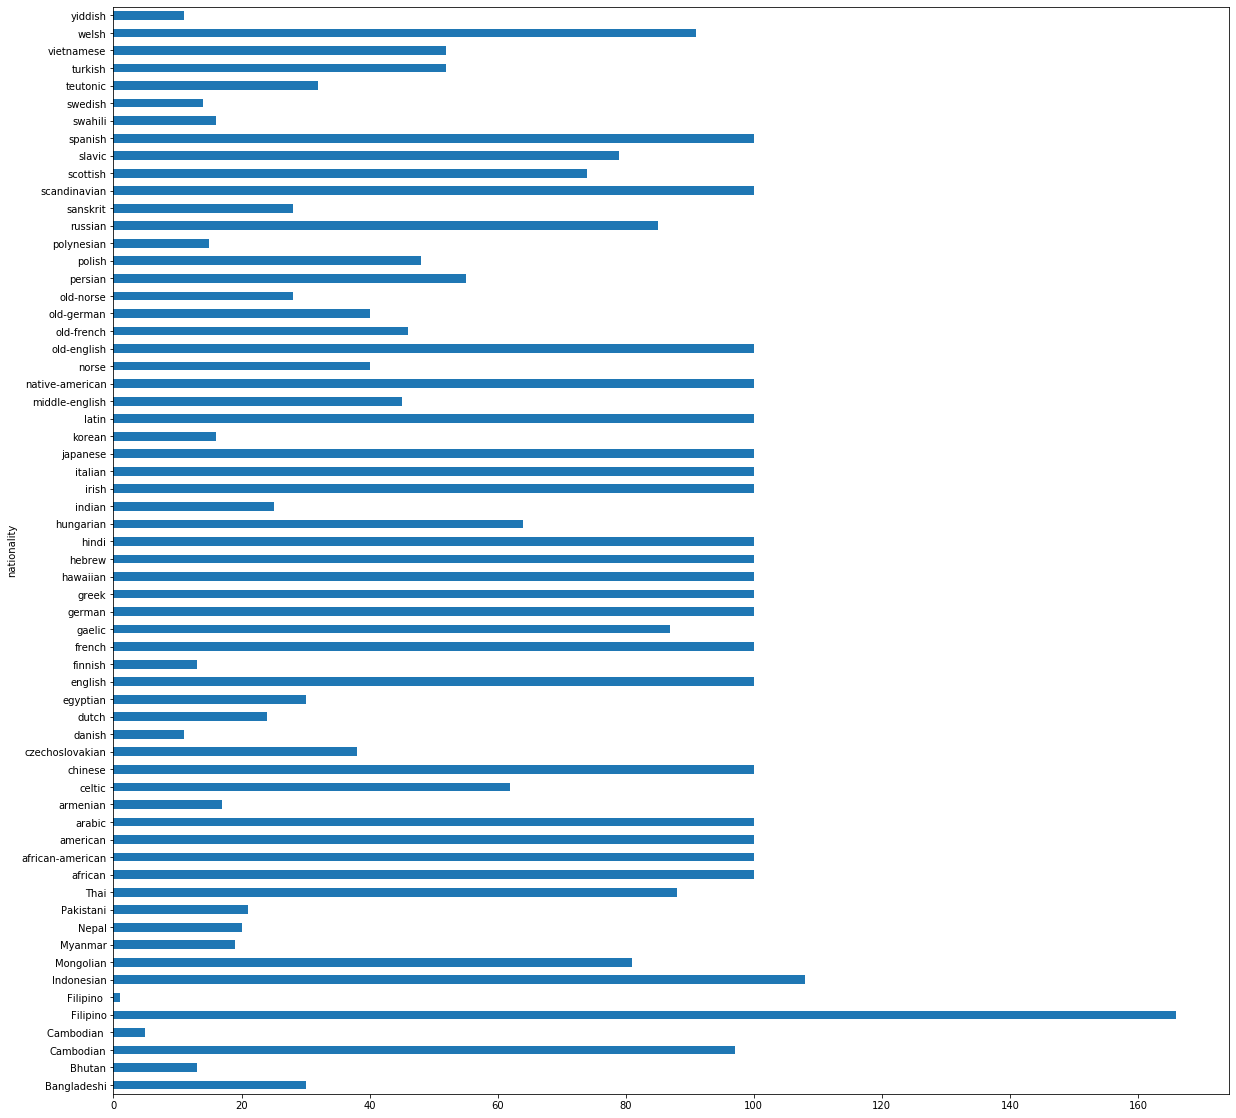

In [13]:
data_frame.groupby('nationality')['names'].count().plot(kind='barh',figsize=(20,20))


## Features selections

In [14]:
Xfeatures=data_frame['names']
Ylabels=data_frame['nationality']

In [15]:

cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [16]:
print(X.shape)
X

(3887, 3579)


<3887x3579 sparse matrix of type '<class 'numpy.int64'>'
	with 3959 stored elements in Compressed Sparse Row format>

In [17]:
cv.get_feature_names()

['aaliyah',
 'aari',
 'aaron',
 'aase',
 'aashish',
 'aat',
 'aawut',
 'aba',
 'aban',
 'abbas',
 'abbellonna',
 'abbott',
 'abby',
 'abdiel',
 'abdul',
 'abdulaziz',
 'abe',
 'abel',
 'abelard',
 'abeni',
 'abeque',
 'abey',
 'abeytu',
 'abhay',
 'abhijit',
 'abhorson',
 'abia',
 'abiba',
 'abie',
 'abigail',
 'abijah',
 'abir',
 'abira',
 'abital',
 'abmaba',
 'abner',
 'abra',
 'abraham',
 'abrahsa',
 'abriana',
 'abril',
 'absolom',
 'abtin',
 'abuna',
 'acacio',
 'acantha',
 'ace',
 'achachak',
 'achara',
 'achariya',
 'acharya',
 'achazia',
 'achilles',
 'achuta',
 'ackley',
 'aco',
 'acton',
 'acura',
 'ada',
 'adahy',
 'adalai',
 'adalbert',
 'adalgisa',
 'adalgiso',
 'adalia',
 'adam',
 'adamina',
 'adan',
 'adar',
 'adara',
 'adare',
 'adb',
 'addai',
 'addison',
 'ade',
 'adelaide',
 'adelbert',
 'adelfried',
 'adelino',
 'adelmio',
 'adelmo',
 'adelpha',
 'ademaro',
 'adena',
 'adeodatus',
 'aderes',
 'adger',
 'adham',
 'adi',
 'adia',
 'adie',
 'adin',
 'aditya',
 'adler'

## Spliting Dataset

In [18]:

x_train,x_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.30,random_state=42)

## Building First Naive bayes Model

In [19]:
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Check the Accuracy of Our Model

In [20]:
result=nv.score(x_test,y_test)
print(result)


0.07883461868037704


In [21]:
print("our Accuracy is",result*100,"%")

our Accuracy is 7.883461868037704 %


## From this model, lets try to predict something

In [22]:

sample1 = ["Kofi"]
vect1 = cv.transform(sample1).toarray()

In [23]:
nv.predict(vect1)


array(['african-american'], dtype='<U16')

## Lets see its right or wrong

In [159]:
records = data_frame.loc[data_frame['names'] =='Shakil']

In [160]:
display(records)

,names,nationality
3183,Shakil,Bangladeshi


## so its predicting the right nationality

## Lets Predict Something more


In [26]:
sample2 = ["Kofi", "Zaide ", "Virsila ", " Zelenka"]
vect2 = cv.transform(sample2).toarray()

In [27]:
nv.predict(vect2)

array(['african-american', 'Filipino', 'Filipino', 'Filipino'],
      dtype='<U16')

## Lets see its right or wrong


In [28]:
records1 = data_frame.loc[data_frame['names'] == "Kofi"]
records2 = data_frame.loc[data_frame['names'] == "Zaide"]
records3 = data_frame.loc[data_frame['names'] == "Virsila"]
records4 = data_frame.loc[data_frame['names'] == "Zelenka"]
                          

In [29]:
records1

,names,nationality
1281,Kofi,african
2004,Kofi,african-american


In [30]:
records2

,names,nationality
529,Zaide,yiddish


In [31]:
records3

,names,nationality
1150,Virsila,czechoslovakian


In [32]:
records4

,names,nationality
2226,Zelenka,czechoslovakian


## SO its not predicting that much good as expected

In [33]:
sample5 = ["barsha"]
vect5 = cv.transform(sample5).toarray()


In [34]:
nv.predict(vect5)

array(['Filipino'], dtype='<U16')

## As naive bayes isn't working that good, Apply some other Algorithms


In [35]:
from sklearn.linear_model import LogisticRegression

## Lets try Logistic regression

In [36]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
result2=logit.score(x_test,y_test)

In [38]:
print("our Accuracy is",result2*100,"%")

our Accuracy is 8.226221079691516 %


In [39]:
logit.predict(vect1)

array(['african-american'], dtype=object)

In [40]:
logit.predict(vect2)

array(['african-american', 'Filipino', 'Filipino', 'Filipino'],
      dtype=object)

In [41]:
sample_3 = ["katya","natasha"]

In [42]:
vect3 = cv.transform(sample_3).toarray()

In [43]:
logit.predict(vect3)


array(['Filipino', 'Filipino'], dtype=object)

## Trying eli5 for showing top features related to all country and also the predicted top features

In [44]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [45]:
import eli5

In [46]:
# Show the weights
eli5.show_weights(logit,target_names=Nationality_type )

In [47]:
feature_names = cv.get_feature_names()

In [48]:
eli5.show_weights(logit,feature_names=feature_names,target_names=Nationality_type )

In [51]:
ex = np.reshape(vect1,-1,1)

## seeing explainations of this

In [52]:
print(eli5.format_as_text(eli5.explain_weights(logit,ex,target_names=Nationality_type,feature_names=feature_names)))

Explained as: linear model

Features with largest coefficients per class.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y='old-german' top features
Weight  Feature 
------  --------
+0.975  rifah   
+0.975  rohan   
+0.975  naomi   
+0.975  namrata 
+0.975  sadia   
+0.975  mohammad
+0.975  emu     
+0.975  mashrar 
+0.975  mahir   
+0.975  fardin  
+0.975  barsha  
+0.975  shourav 
+0.975  simanto 
+0.975  aysha   
+0.975  syeda   
+0.975  ashik   
+0.975  abir    
+0.975  rafi    
+0.975  fahim   
… 2 more positive …
… 2560 more negative …
-4.656  <BIAS>  

y='native-american' top features
W

## Single Pred Explanation with Eli5

## See the real nationality and compare with the weights

In [53]:
data_frame.loc[data_frame['names'] == 'Kofi']

,names,nationality
1281,Kofi,african
2004,Kofi,african-american


## See the weights and explaination

In [54]:
ex = np.reshape(vect1,-1,1)

In [55]:
eli5.show_prediction(logit,ex,target_names=Nationality_type,feature_names=feature_names)

In [56]:
print(eli5.format_as_text(eli5.explain_weights(logit,ex,target_names=Nationality_type,feature_names=feature_names)))

Explained as: linear model

Features with largest coefficients per class.
Caveats:
1. Be careful with features which are not
   independent - weights don't show their importance.
2. If scale of input features is different then scale of coefficients
   will also be different, making direct comparison between coefficient values
   incorrect.
3. Depending on regularization, rare features sometimes may have high
   coefficients; this doesn't mean they contribute much to the
   classification result for most examples.

y='old-german' top features
Weight  Feature 
------  --------
+0.975  rifah   
+0.975  rohan   
+0.975  naomi   
+0.975  namrata 
+0.975  sadia   
+0.975  mohammad
+0.975  emu     
+0.975  mashrar 
+0.975  mahir   
+0.975  fardin  
+0.975  barsha  
+0.975  shourav 
+0.975  simanto 
+0.975  aysha   
+0.975  syeda   
+0.975  ashik   
+0.975  abir    
+0.975  rafi    
+0.975  fahim   
… 2 more positive …
… 2560 more negative …
-4.656  <BIAS>  

y='native-american' top features
W

In [57]:
explanation_pred = eli5.explain_prediction_df(estimator=logit, doc=ex)

In [58]:
explanation_pred

,target,feature,weight,value
0,Bangladeshi,x2204,-0.009330,1.0
1,Bangladeshi,<BIAS>,-4.655793,1.0
2,Bhutan,x2204,-0.004859,1.0
3,Bhutan,<BIAS>,-5.317182,1.0
4,Cambodian,x2204,-0.025867,1.0
...,...,...,...,...
119,vietnamese,<BIAS>,-4.290568,1.0
120,welsh,x2204,-0.024322,1.0
121,welsh,<BIAS>,-3.667391,1.0
122,yiddish,x2204,-0.004535,1.0


In [59]:
explanation_pred = eli5.formatters.as_dataframe.explain_prediction_df(estimator=logit, 
doc=ex, feature_names=feature_names)

In [60]:
explanation_pred

,target,feature,weight,value
0,Bangladeshi,kofi,-0.009330,1.0
1,Bangladeshi,<BIAS>,-4.655793,1.0
2,Bhutan,kofi,-0.004859,1.0
3,Bhutan,<BIAS>,-5.317182,1.0
4,Cambodian,kofi,-0.025867,1.0
...,...,...,...,...
119,vietnamese,<BIAS>,-4.290568,1.0
120,welsh,kofi,-0.024322,1.0
121,welsh,<BIAS>,-3.667391,1.0
122,yiddish,kofi,-0.004535,1.0


In [61]:
explanation_pred[['feature','target','weight']].nlargest(5, ['weight'])

,feature,target,weight
26,kofi,african-american,0.935891
10,kofi,Filipino,-0.002559
6,kofi,Cambodian,-0.003208
122,kofi,yiddish,-0.004535
2,kofi,Bhutan,-0.004859


## Lets Try NLP

In [62]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\shakil\anaconda3\lib\site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [63]:
import gensim

In [298]:
 df = pd.read_csv('names_data.csv',encoding='unicode_escape')
 df.head()

,names,nationality
0,Gershon,yiddish
1,Lantz,yiddish
2,Zaide,yiddish
3,Zalman,yiddish
4,Zindel,yiddish


In [299]:
##Create a new column
df['name_nationality']= df['names']

In [300]:
### Select features from original dataset to form a new dataframe 
df1 = df[['names','name_nationality']]

In [301]:
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
df2

0         Gershon,Gershon
1             Lantz,Lantz
2             Zaide,Zaide
3           Zalman,Zalman
4           Zindel,Zindel
              ...        
3885        Vidura,Vidura
3886            Waan,Waan
3887            Waen,Waen
3888      Yod Rak,Yod Rak
3889    Yuthakon,Yuthakon
Length: 3890, dtype: object

In [302]:
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
df_clean

,clean
0,"Gershon,Gershon"
1,"Lantz,Lantz"
2,"Zaide,Zaide"
3,"Zalman,Zalman"
4,"Zindel,Zindel"
...,...
3885,"Vidura,Vidura"
3886,"Waan,Waan"
3887,"Waen,Waen"
3888,"Yod Rak,Yod Rak"


In [303]:
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]

In [304]:
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:3]


[['Gershon', 'Gershon'], ['Lantz', 'Lantz'], ['Zaide', 'Zaide']]

In [305]:
##Genism word2vec Model Training
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [306]:
model['Kofi','Aron']

array([[ 0.00966876, -0.00239411, -0.00128972,  0.00509831, -0.00401964,
         0.00894288,  0.00250752, -0.00196161, -0.00932417, -0.00350609,
         0.00030417, -0.00234741, -0.00679524, -0.00328199,  0.00630936,
         0.00975883,  0.0013109 ,  0.0042679 ,  0.00766429,  0.00197241,
         0.00218659, -0.00640786, -0.0038773 ,  0.00851566,  0.00350512,
        -0.00634619, -0.00815996,  0.00384629,  0.00102383,  0.00689136,
        -0.0098212 ,  0.00848708,  0.00872381,  0.00765805,  0.00044599,
         0.00271987,  0.00522244,  0.00274282, -0.00886501, -0.00322098,
         0.00046199,  0.00811534, -0.00826597,  0.00139621, -0.00518573,
         0.0022496 ,  0.00345522, -0.01014237, -0.00590764, -0.00938643],
       [-0.00595574,  0.00725649, -0.00345232,  0.00395857,  0.00305332,
         0.00123407, -0.00320038, -0.0087422 , -0.00532456,  0.00203148,
        -0.00329602, -0.0030111 ,  0.00338162, -0.00511645,  0.00892296,
        -0.00885247,  0.00903152, -0.00081981, -0.

In [212]:
## Compile similarities
model.similarity('Shakil', 'Mahmudur')

0.082297355

In [307]:
model.most_similar(['Syeda','Mimi'])[:10]


[('Elbert', 0.5017811059951782),
 ('Kaili', 0.47916823625564575),
 ('Lilike', 0.4541057050228119),
 ('Chakra', 0.4447478652000427),
 ('Atohi', 0.4357869625091553),
 ('Khanh', 0.41492342948913574),
 ('Shylah', 0.4033236503601074),
 ('Rodolf', 0.3928094208240509),
 ('Elita', 0.38987624645233154),
 ('Anand', 0.3866158127784729)]

## Lets try cosine similarities

[('Caelan', 0.5482968),
 ('Sadb', 0.44631213),
 ('Maeryn', 0.43822595),
 ('Delfina', 0.41757795),
 ('Hoshi', 0.41101643)]

## 2nd Word2Vec Model

In [333]:
##Lets see all the words in dictionary now

{'Blaan': <gensim.models.keyedvectors.Vocab object at 0x000001B74CCA2308>, 'Lee': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93A48>, 'Blaine': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93488>, 'Kalene': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93D88>, 'Deiondre': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93FC8>, 'Denzel': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93EC8>, 'Kendis': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93B48>, 'Doli': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC939C8>, 'Campbell': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC933C8>, 'Carey': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93808>, 'Cara': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93E88>, 'Bela': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93B08>, 'Alice': <gensim.models.keyedvectors.Vocab object at 0x000001B74CC93188>, 'Dustin': <gensim.models.keyedve

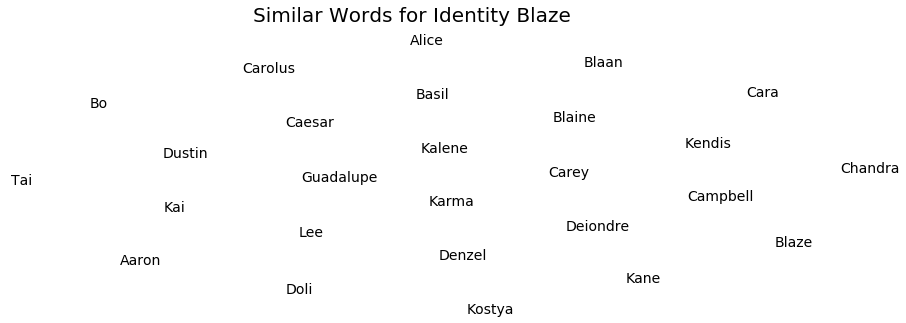